In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define paths
zip_file_path = '/content/drive/MyDrive/gods30.zip'
extracted_dir_path = '/content/tabular'

# Create the target directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Extraction completed successfully.")


Extraction completed successfully.


In [ ]:
import pandas as pd

train=pd.read_csv('/content/tabular/Train.csv')
train.head()


,filename,Hardhat,Mask,NO-Hardhat,NO-Mask,NO-Safety Vest,Person,Safety Cone,Safety Vest,machinery,vehicle
0,youtube-348_jpg.rf.c478843562d5236a46c6448ecc3...,1,1,0,1,1,1,0,1,1,1
1,youtube-196_jpg.rf.c4db8b391b275b84d6183839008...,1,0,1,1,1,1,1,1,1,0
2,construction-1-_mp4-46_jpg.rf.c4db8e0500825ba1...,1,1,1,0,1,1,0,0,1,0
3,youtube-710_jpg.rf.c4e2b15fb3e7fac762b9a0f5457...,1,1,0,1,1,1,0,1,1,0
4,construction-2-_mp4-15_jpg.rf.c4fcd7ed43e0f6c2...,0,1,0,0,1,1,0,0,1,0


In [ ]:
y_voiture=train[' vehicle'].values

In [ ]:
features=train.drop(columns=['filename']).columns.tolist()

features

[' Hardhat',
 ' Mask',
 ' NO-Hardhat',
 ' NO-Mask',
 ' NO-Safety Vest',
 ' Person',
 ' Safety Cone',
 ' Safety Vest',
 ' machinery',
 ' vehicle']

In [ ]:
# import os
# import shutil
# import pandas as pd



# # Source directory containing all images
# source_directory = '/content/tabular/data/train'



# # Iterate through each feature
# for feature in features:
#     # Destination directory where images meeting the conditions will be copied
#     destination_directory = f'/content/tabular/target_train/{feature}_images'

#     # Create destination directory if it doesn't exist
#     os.makedirs(destination_directory, exist_ok=True)
#     # Filter the training dataset based on the current feature
#     filenames = train[train[feature] == 1]['filename'].values

#     # Iterate through the source directory
#     for filename in os.listdir(source_directory):
#         # Check if the filename is in the list of filenames
#         if filename in filenames:
#             # Copy the image to the destination directory
#             shutil.copy(os.path.join(source_directory, filename), destination_directory)



In [ ]:
import numpy as np
targets=np.array(train.drop(columns=['filename']))
targets

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 1]])

In [ ]:
import os
import shutil
import random

# Define paths
data_dir = '/content/tabular/data/splited_data'
train_dir = os.path.join(data_dir, 'train')
eval_dir = os.path.join(data_dir, 'eval')

# Create train and eval directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(eval_dir, exist_ok=True)

# Original directory containing images
original_dir = '/content/tabular/data/train'

# List all image files in the original directory
image_files = os.listdir(original_dir)#[f for f in os.listdir(original_dir) if os.path.isfile(os.path.join(original_dir, f))]

# Shuffle the image files
random.shuffle(image_files)

# Calculate the number of images for eval set (e.g., 20% of the total)
eval_size = int(len(image_files) * 0.2)

# Split the image files into train and eval sets
train_files = image_files[eval_size:]
eval_files = image_files[:eval_size]

train_targets = targets[eval_size:]
eval_targets = targets[:eval_size]

# Move train files to train directory
for file_name in train_files:
    src = os.path.join(original_dir, file_name)
    dest = os.path.join(train_dir, file_name)
    shutil.move(src, dest)

# Move eval files to eval directory
for file_name in eval_files:
    src = os.path.join(original_dir, file_name)
    dest = os.path.join(eval_dir, file_name)
    shutil.move(src, dest)

print("Files split and moved successfully.")



Files split and moved successfully.


In [ ]:
image_files[:5]

['youtube-813_jpg.rf.0968e838fb93d228106ef81f156bc23f.jpg',
 'construction-649-_jpg.rf.d462cf37481602b57e0ef1809c0a3a79.jpg',
 'image_288_jpg.rf.6bf35bf78a306e9f5383cc6da426923e.jpg',
 'youtube-824_jpg.rf.689205630558f79097b84b70dc1424b2.jpg',
 '-1670-_png_jpg.rf.b78b932a9dd4325b9f2268f257195a81.jpg']

In [ ]:
######whitout data aug
import os
import cv2  # You may need to install OpenCV: pip install opencv-python
import numpy as np

# Define the directory containing the images
directory = '/content/tabular/data/splited_data/train'

# Initialize lists to store images and their corresponding targets
train_images = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter image files
        # Read the image using OpenCV
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)

        # Preprocess the image (resize, normalize, etc.) as needed
        # For example, resizing to 224x224
        image = cv2.resize(image, (224, 224))
        image = image.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]

        # Append the image to the list of images
        train_images.append(image)

# Convert the lists to numpy arrays
train_images = np.array(train_images)

# Print the shape of images and targets to verify
print("Shape of images array:", train_images.shape)
print("Shape of targets array:", train_targets.shape)



Shape of images array: (2083, 224, 224, 3)
Shape of targets array: (2083, 10)


In [ ]:
import os
import cv2  # You may need to install OpenCV: pip install opencv-python
import numpy as np

# Define the directory containing the images
directory = '/content/tabular/data/splited_data/eval'

# Initialize lists to store images and their corresponding targets
eval_images = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter image files
        # Read the image using OpenCV
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)

        # Preprocess the image (resize, normalize, etc.) as needed
        # For example, resizing to 224x224
        image = cv2.resize(image, (224, 224))
        image = image.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]

        # Append the image to the list of images
        eval_images.append(image)

# Convert the lists to numpy arrays
eval_images = np.array(eval_images)

# Print the shape of images and targets to verify
print("Shape of images array:", eval_images.shape)
print("Shape of targets array:", eval_targets.shape)



Shape of images array: (520, 224, 224, 3)
Shape of targets array: (520, 10)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Load pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(targets.shape[1], activation='sigmoid')  # Assuming you have 10 classes
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-2),
              loss='binary_crossentropy',  # Assuming your targets are integers
              metrics=['accuracy'])

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Fit the model with data augmentation and callbacks
history = model.fit(datagen.flow(train_images, train_targets, batch_size=8),
                    steps_per_epoch=len(train_images) // 8,
                    epochs=50,
                    validation_data=(eval_images, eval_targets),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/50
260/260 [==============================] - 35s 123ms/step - loss: 0.6751 - accuracy: 0.0670 - val_loss: 0.6081 - val_accuracy: 0.0577
Epoch 2/50
260/260 [==============================] - 31s 118ms/step - loss: 0.5978 - accuracy: 0.0651 - val_loss: 0.5857 - val_accuracy: 0.0577
Epoch 3/50
260/260 [==============================] - 31s 121ms/step - loss: 0.5869 - accuracy: 0.0655 - val_loss: 0.5851 - val_accuracy: 0.0577
Epoch 4/50
260/260 [==============================] - 32s 123ms/step - loss: 0.5869 - accuracy: 0.0655 - val_loss: 0.5848 - val_accuracy: 0.0577
Epoch 5/50
260/260 [==============================] - 31s 120ms/step - loss: 0.5866 - accuracy: 0.0651 - val_loss: 0.5851 - val_accuracy: 0.0577
Epoch 6/50
260/260 [==============================] - 31s 117ms/step - loss: 0.5866 - accuracy: 0.0655 - val_loss: 0.5855 - val_accuracy: 0.0577
Epoch 7/50
260/260 [==============================] - 32s 122ms/step - loss: 0.5868 - accuracy: 0.0651 - val_loss: 0.5854 - val_ac

# Resnet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Load pre-trained ResNet50 model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(targets.shape[1], activation='sigmoid')  # Assuming you have 10 classes
])

# Compile the model
model2.compile(optimizer=SGD(),
              loss='binary_crossentropy',  # Assuming your targets are integers
              metrics=['accuracy'])

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Fit the model with data augmentation and callbacks
history = model2.fit(datagen.flow(train_images, train_targets, batch_size=8),
                    steps_per_epoch=len(train_images) // 8,
                    epochs=50,
                    validation_data=(eval_images, eval_targets),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
260/260 [==============================] - 51s 179ms/step - loss: 0.6170 - accuracy: 0.0641 - val_loss: 0.5900 - val_accuracy: 0.0577
Epoch 2/50
 87/260 [=========>....................] - ETA: 20s - loss: 0.5957 - accuracy: 0.0767

# InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K

import tensorflow.keras.backend as K



# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Load pre-trained InceptionV3 model without the top classification layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(32, activation='relu'),
    # Dropout(0.5),
    # Dense(256, activation='relu'),
    # Dropout(0.5),
    # Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(targets.shape[1], activation='sigmoid')  # Assuming you have 10 classes
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-3),
              loss='binary_crossentropy',  # Assuming your targets are integers
              metrics=['accuracy'])

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Train the model with data augmentation and callbacks
history = model.fit(datagen.flow(train_images, train_targets, batch_size=8),
                    steps_per_epoch=len(train_images) // 8,
                    epochs=50,
                    validation_data=(eval_images, eval_targets),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/50


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "<ipython-input-60-46350fc0866f>", line 15, in mean_log_loss  *
        log_loss_per_label = -y_true * K.log(y_pred + K.epsilon()) - (1 - y_true) * K.log(1 - y_pred + K.epsilon())

    TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type int64 of argument 'x'.


# Basic CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(targets.shape[1], activation='sigmoid')  # Assuming you have 10 classes
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='binary_crossentropy',  # Assuming your targets are integers
              metrics=['accuracy'])

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Train the model with data augmentation and callbacks
history = model.fit(datagen.flow(train_images, train_targets, batch_size=8),
                    steps_per_epoch=len(train_images) // 8,
                    epochs=50,
                    validation_data=(eval_images, eval_targets),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/50
260/260 [==============================] - 42s 148ms/step - loss: 0.6292 - accuracy: 0.0583 - val_loss: 0.5865 - val_accuracy: 0.0577
Epoch 2/50
260/260 [==============================] - 29s 112ms/step - loss: 0.5962 - accuracy: 0.0651 - val_loss: 0.5883 - val_accuracy: 0.0577
Epoch 3/50
228/260 [=========================>....] - ETA: 3s - loss: 0.5943 - accuracy: 0.0610

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import log_loss

# Assuming predictions is a numpy array with shape (num_samples, num_classes)
# and eval_targets is a numpy array with the same shape
# where each row represents the predicted probabilities for each class
# and each row in eval_targets represents the true labels in one-hot encoded format
# If your eval_targets are not in one-hot encoded format, you need to convert them
# For example, if eval_targets contains integers representing class labels:
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# eval_targets = lb.fit_transform(eval_targets)
predictions = model.predict(eval_images)#+model2.predict(eval_images))/2
# Calculate log loss for each column (class) separately
log_losses = []
for i in range(eval_targets.shape[1]):
    log_loss_i = log_loss(eval_targets[:, i], predictions[:, i])
    log_losses.append(log_loss_i)

# Calculate the mean log loss
mean_log_loss = sum(log_losses) / len(log_losses)

print("Mean column-wise log loss:", mean_log_loss)


17/17 [==============================] - 2s 66ms/step
Mean column-wise log loss: 0.8102194247932699


17/17 [==============================] - 2s 115ms/step


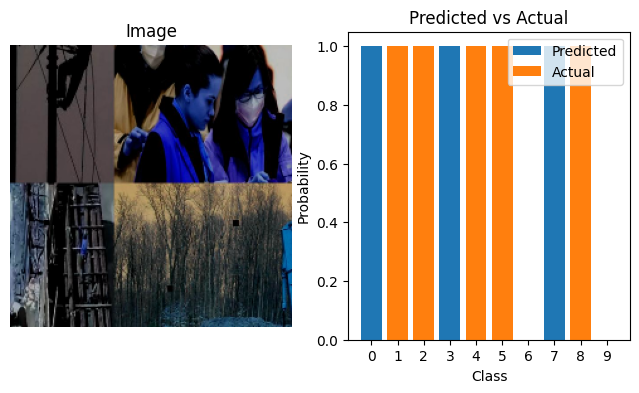

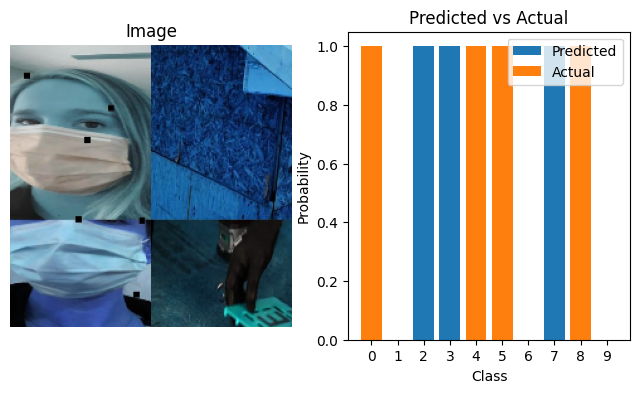

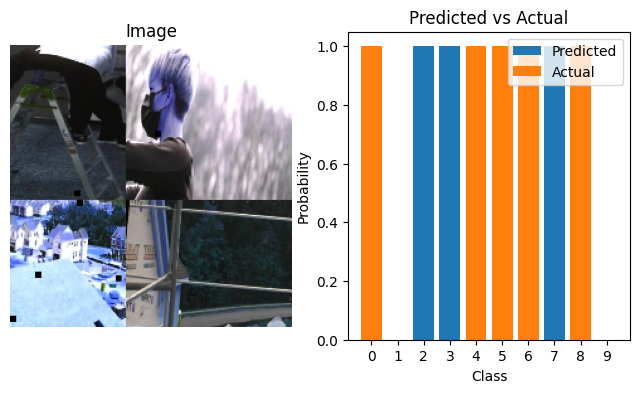

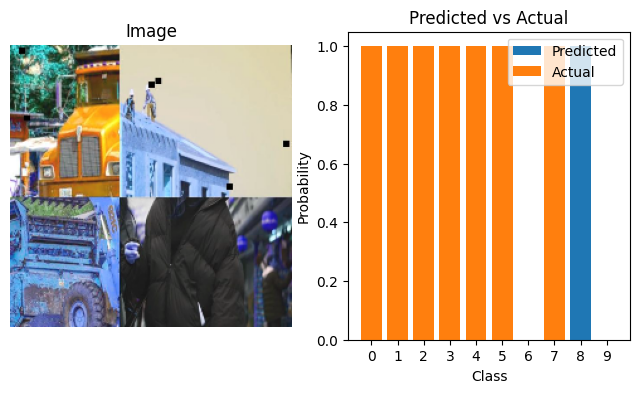

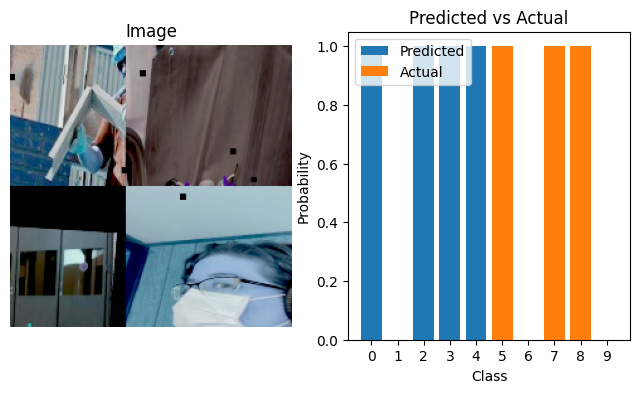

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict classes for evaluation images
predictions = model.predict(eval_images).round()

# Choose a few random images to display
num_images_to_display = 5
random_indices = np.random.choice(len(eval_images), num_images_to_display, replace=False)

# Display images along with their predictions and actual classes
for i in random_indices:
    plt.figure(figsize=(8, 4))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(eval_images[i])
    plt.axis('off')
    plt.title('Image')

    # Display the predicted classes and actual classes
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(len(predictions[i])), predictions[i], label='Predicted')
    plt.bar(np.arange(len(eval_targets[i])), eval_targets[i], label='Actual')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Predicted vs Actual')
    plt.xticks(np.arange(len(predictions[i])))
    plt.legend()

    plt.show()


# Again Multiclassification


In [ ]:
import numpy as np

# Predict classes for evaluation images
predictions = model.predict(eval_images)

# Get the predicted class indices for each image
predicted_classes = predictions.round()


17/17 [==============================] - 2s 141ms/step


In [ ]:
predictions[0].round()

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0.], dtype=float32)

In [ ]:
predicted_classes

array([[1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]], dtype=float32)

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.30588236, 0.30588236, 0.30588236],
        [0.3529412 , 0.3529412 , 0.3529412 ],
        [0.40392157, 0.40392157, 0.40392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.4862745 , 0.4862745 , 0.4862745 ],
        [0.46666667, 0.46666667, 0.46666667],
        [0.41568628, 0.41568628, 0.41568628]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.54509807, 0.54509807, 0.54509807],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.41960785, 0.41960785, 0.41960785]],

       ...,

       [[0.05098039, 0.05098039, 0.05098039],
        [0.06666667, 0.06666667, 0.06666667],
        [0.08235294, 0

In [ ]:
import os
import cv2  # You may need to install OpenCV: pip install opencv-python
import numpy as np

# Define the directory containing the images
directory = '/content/tabular/data/test'

# Initialize lists to store images and their corresponding targets
test_images = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter image files
        # Read the image using OpenCV
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)

        # Preprocess the image (resize, normalize, etc.) as needed
        # For example, resizing to 224x224
        image = cv2.resize(image, (224, 224))
        image = image.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]

        # Append the image to the list of images
        test_images.append(image)

# Convert the lists to numpy arrays
test_images = np.array(test_images)

# Print the shape of images and targets to verify
print("Shape of images array:", test_images.shape)


Shape of images array: (196, 224, 224, 3)


In [ ]:
filenames_test= os.listdir('/content/tabular/data/test')
filenames_test


['006463_jpg.rf.02f19082420ecc5537b9d59abbe6050c.jpg',
 'ppe_1228_jpg.rf.29b714c415ea74df3160f56a603463a0.jpg',
 'youtube-51_jpg.rf.083f4487f9a468d9ff42aa13953f377a.jpg',
 'youtube-114_jpg.rf.5e02b6574ace1f4b3689befbc5051cd0.jpg',
 '-1989-_png_jpg.rf.8cb3d6087bb86d08e693b4250fbf96e3.jpg',
 'autox4_mp4-72_jpg.rf.5e9c1836f027bf40eb8898e68f2efdeb.jpg',
 'youtube-287_jpg.rf.c9a7d5b17f75d0c9ed62ad4127141aa2.jpg',
 'Bookstore_More_Merchandise_jpg.rf.7ab5add3e28ced74f9b316e794cc04d2.jpg',
 'youtube-267_jpg.rf.acd9b5f407f573eaa830029418345ad3.jpg',
 'construction-800-_jpg.rf.a01fcddd0db9cc89c0cacf4af88c468d.jpg',
 'youtube-804_jpg.rf.c4250b3c54e1cca8d58622970882f60a.jpg',
 'youtube-53_jpg.rf.e96f8f81389f4e63a79663095680a617.jpg',
 'autox3_mp4-78_jpg.rf.dc5c00104c4cf733c2c06c820b82d338.jpg',
 'youtube-367_jpg.rf.fab8b016cb63c0928f40849db44ee98d.jpg',
 'construction-9-_jpg.rf.c2af6f04317b1ea7d6e2a84d776788a2.jpg',
 'IMG_3103_mp4-17_jpg.rf.3223d405c1b3657aa54e170e32c8fe52.jpg',
 'youtube-510_jpg.

In [ ]:
final_predictions= model.predict(test_images)#.round()
final_predictions

7/7 [==============================] - 1s 77ms/step


array([[0.42219752, 0.55470365, 0.5731629 , ..., 0.405808  , 0.42949   ,
        0.27237946],
       [0.36605224, 0.6626692 , 0.59108096, ..., 0.40663427, 0.17878859,
        0.06859165],
       [0.88009596, 0.8119431 , 0.59016466, ..., 0.12001505, 0.6260758 ,
        0.5071489 ],
       ...,
       [0.3445433 , 0.64019686, 0.64906216, ..., 0.550446  , 0.32987544,
        0.10215049],
       [0.4076968 , 0.77227205, 0.62663627, ..., 0.22417663, 0.34286153,
        0.37388656],
       [0.37912878, 0.36146826, 0.2204834 , ..., 0.32197234, 0.6231469 ,
        0.11681008]], dtype=float32)

In [ ]:
sample_submission = pd.read_csv('/content/tabular/SampleSubmission.csv')

In [ ]:
sample_submission

,ID,Hardhat,Mask,NO-Hardhat,NO-Mask,NO-Safety Vest,Person,Safety Cone,Safety Vest,machinery,vehicle
0,ID_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191,ID_192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,ID_193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,ID_194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,ID_195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = pd.read_csv('/content/tabular/Test.csv')
test.head()

,ID,filename
0,ID_1,006463_jpg.rf.02f19082420ecc5537b9d59abbe6050c...
1,ID_2,youtube-34_jpg.rf.03eacc444bae3c5caa3fef5c736c...
2,ID_3,IMG_0871_mp4-23_jpg.rf.03f872b1ed87ad7fadc85e0...
3,ID_4,youtube-596_jpg.rf.11a8a4ac01d8aadb80eeb0406df...
4,ID_5,ka_01181_png_jpg.rf.154ee4ef254eabd62e316be504...


In [ ]:

str(test[test.filename==filenames_test[1]].ID.values[0])

'ID_96'

In [ ]:
for idx in range(len(test)):
    filename = filenames_test[idx]
    ID = str(test[test['filename'] == filename]['ID'].values[0])
    sample_submission.loc[sample_submission['ID'] == ID, sample_submission.columns[1:]] = final_predictions[idx]



In [ ]:
sample_submission

,ID,Hardhat,Mask,NO-Hardhat,NO-Mask,NO-Safety Vest,Person,Safety Cone,Safety Vest,machinery,vehicle
0,ID_1,0.422198,0.554704,0.573163,0.482930,0.713235,0.398649,0.295308,0.405808,0.429490,0.272379
1,ID_2,0.590063,0.762993,0.722506,0.279114,0.779605,0.680586,0.157548,0.222340,0.513501,0.191614
2,ID_3,0.422488,0.729679,0.670093,0.463246,0.811657,0.600381,0.707547,0.035472,0.555796,0.073788
3,ID_4,0.303957,0.619228,0.507720,0.381071,0.766407,0.551184,0.153272,0.291682,0.596680,0.196074
4,ID_5,0.806039,0.934168,0.713382,0.697830,0.897085,0.445886,0.810003,0.652858,0.818471,0.186104
...,...,...,...,...,...,...,...,...,...,...,...
191,ID_192,0.510620,0.735176,0.500954,0.210253,0.624805,0.470292,0.372863,0.289972,0.584215,0.100568
192,ID_193,0.298647,0.336138,0.295831,0.125800,0.814831,0.537394,0.336142,0.237608,0.554077,0.033463
193,ID_194,0.739158,0.907407,0.875595,0.152542,0.941940,0.573679,0.497424,0.123027,0.430651,0.260970
194,ID_195,0.341136,0.843915,0.750039,0.323534,0.669724,0.576059,0.144265,0.152083,0.424487,0.187982


In [ ]:
# Save the sample_submission DataFrame to a CSV file
sample_submission.to_csv('sample_submission_inceptionv3.csv', index=False)
